##### import required libraries.
##### laod diamond dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
plt.style.use('seaborn-bright')

In [4]:
diamond = pd.read_csv("diamonds.csv")

In [5]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#HERE WE DROP THE UNWANTED COLUMN
diamond.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Write a Python program to display all Univariate Plots from the dataframe.


1.   Numeric based plots
2.   Categorical based plots




## 1.Histograms:

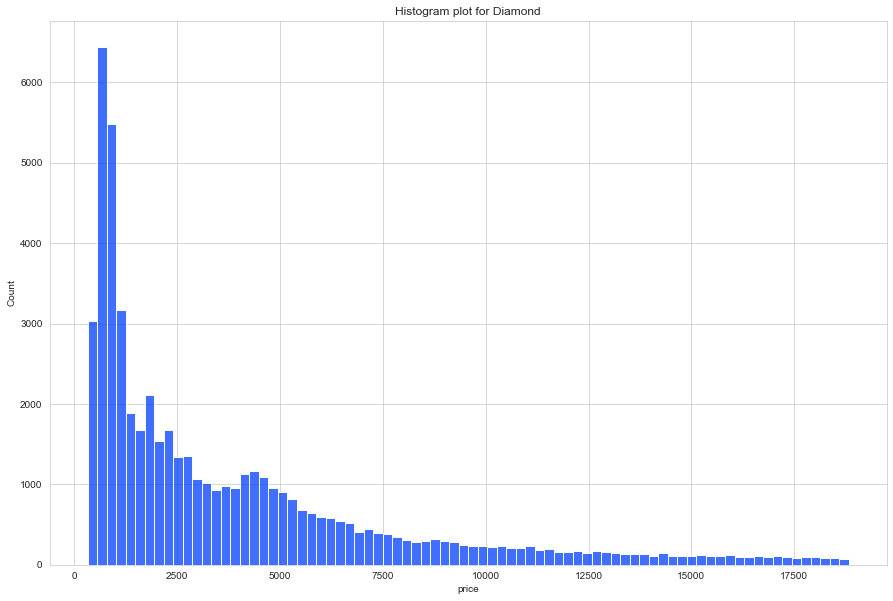

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(x='price', data=diamond)
plt.title("Histogram plot for Diamond")
plt.show()

From a histogram, we will get the following:

Range of the data. The minimum and maximum values are on opposite edges of the histogram. Highly concentrated regions are also apparent. Tall bars are where most data points fall whereas sparsely represented ranges appear as short bars.

Presence of outliers. These appear as isolated bars on the far left to right.

#### The code below utilizes a loop to create individual histograms for all numeric variables.

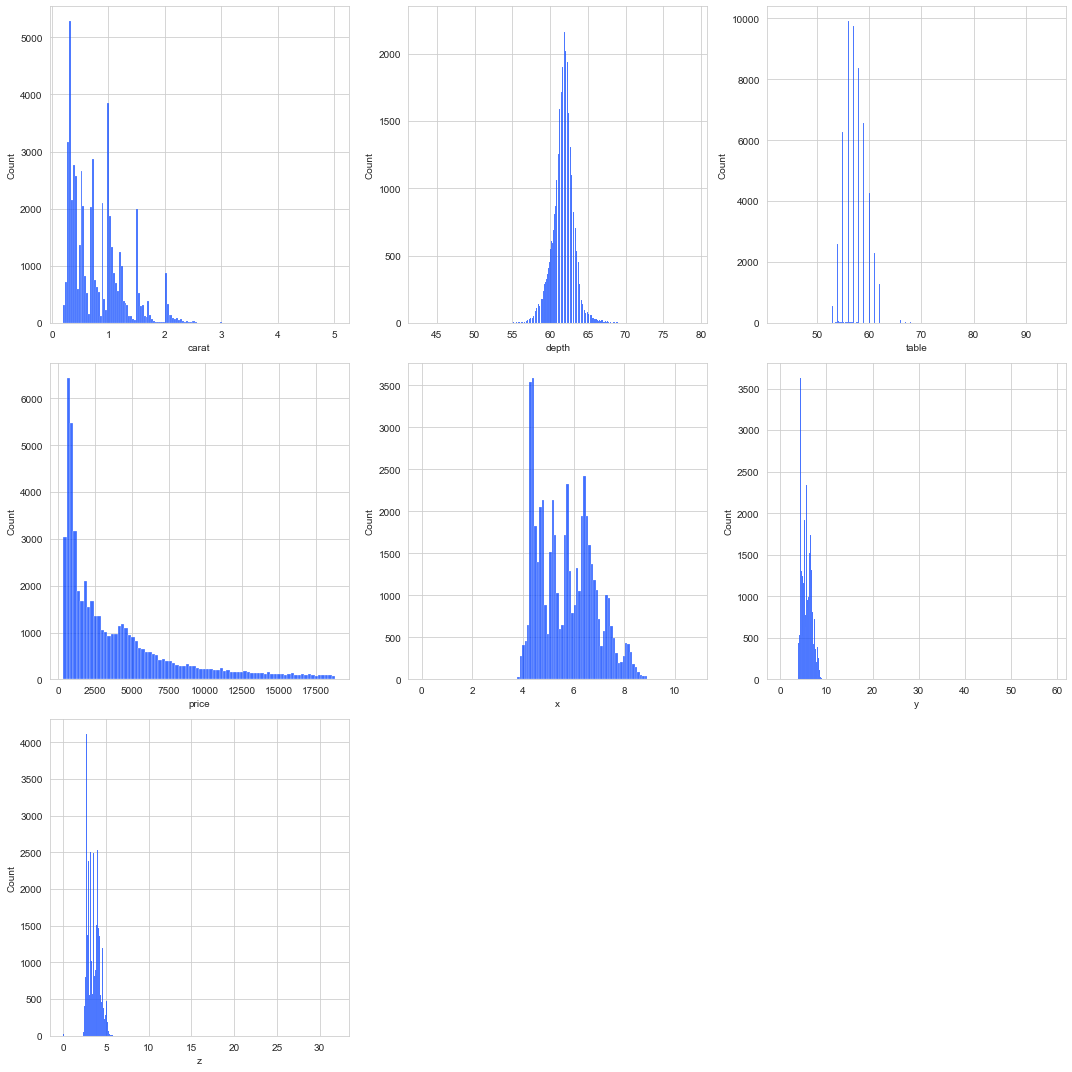

In [9]:
cols = 3
rows = 3
num_cols = diamond.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = diamond[col], ax = ax)
    
fig.tight_layout()  
plt.show()

## 2. KDE plot

#### The ‘kernel density estimate’ plot creates a smooth version of a histogram by normalizing all points to appear under one curve.

#### The code below compares how diamonds are distributed among the carat. We pass hue=’color’ to split the data by the diamonds.

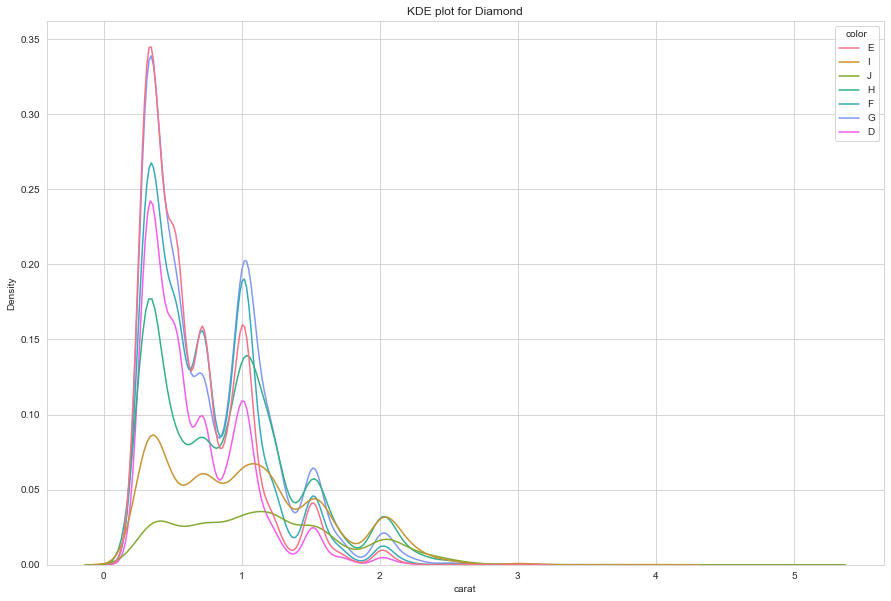

In [10]:
plt.figure(figsize=(15,10))
sns.kdeplot(x='carat', data=diamond, hue='color')
plt.title("KDE plot for Diamond")
plt.show()

## 3.KDE with Histogram plot

##### We can display a histogram with a KDE curve as below. See this post for an understanding of kde and histogram.

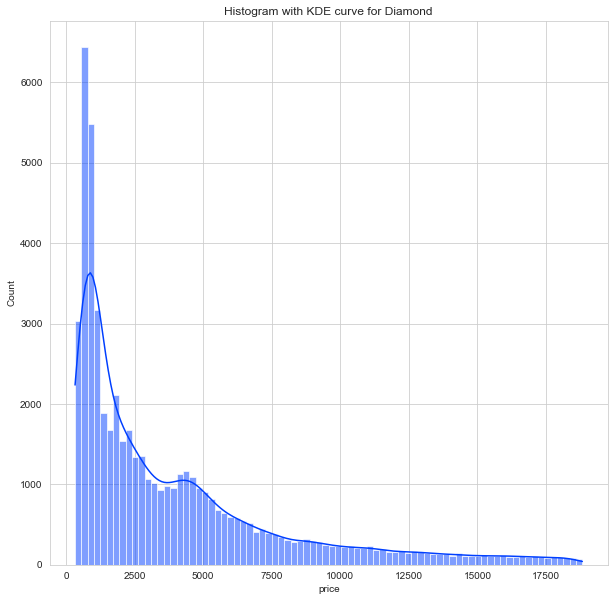

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(x='price', data=diamond, kde=True)
plt.title("Histogram with KDE curve for Diamond")
plt.show()

## 4.Rug plot

#### A rug plot draws ticks on the x-axis that show the location of individual data points

##### Rug plots complement histograms when it comes to outliers because we can see where the outlier data points fall. The code below creates a rugplot and histogram for the price feature. Note the outlier positions.



<AxesSubplot:xlabel='price', ylabel='Count'>

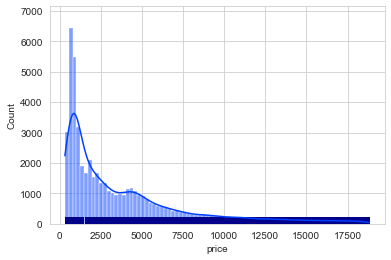

In [12]:
sns.rugplot(x='price', data=diamond, height=.03, color='darkblue')
sns.histplot(x='price', data=diamond, kde=True)

## 5. Box Plot:

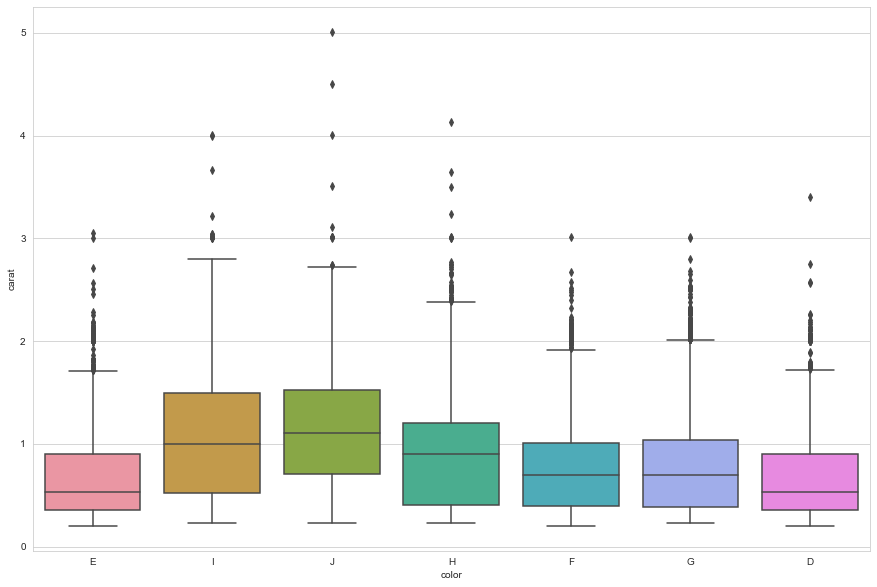

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x='color',y='carat',data=diamond)
plt.show()

#### Suppose you want to compare the distribution of two columns that are related; perhaps they have the different types of data. We can create a box plot and pass the two columns in the data as below.

## 6.Strip Plot

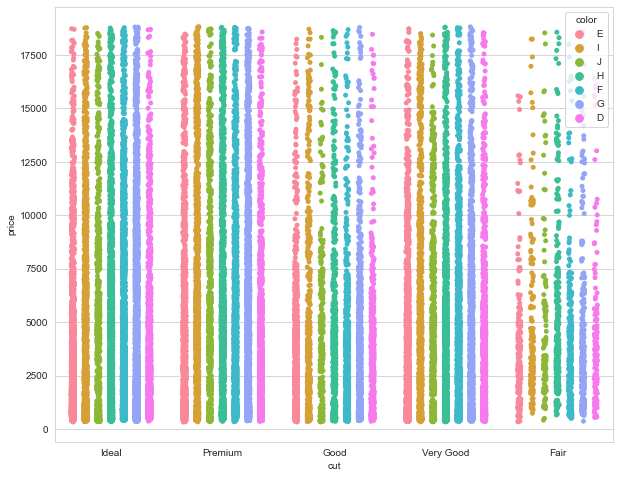

In [14]:
plt.figure(figsize=(10,8))
sns.stripplot(x='cut', y='price', data=diamond,
              jitter=True, hue='color', dodge=True)
plt.show()

##### A strip plot implements a scatter plot to show the spread of individual observations for a feature.

Dense locations indicate areas with many overlapping points, and you can quickly spot outliers. It’s however hard to establish the relative center unlike a box plot, and it’s best for smaller datasets

## 7.Violin PLot

<Figure size 720x720 with 0 Axes>

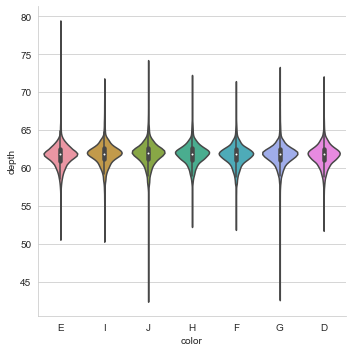

In [15]:
plt.figure(figsize=(10,10))
sns.catplot(x='color',y='depth',data=diamond,kind='violin')
plt.show()

The violin plot features a combination of a box plot and a kernel density plot. This means that in addition to showing the quartiles, it also lays out the underlying distribution such as presence and location of different peaks.

### 8. Count Plot

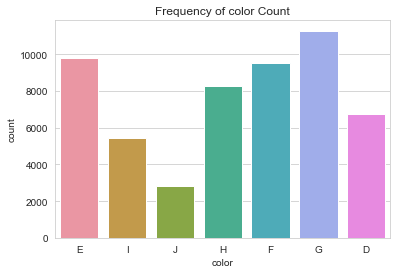

In [16]:
sns.countplot(x='color',data=diamond)
plt.title("Frequency of color Count")
plt.show()

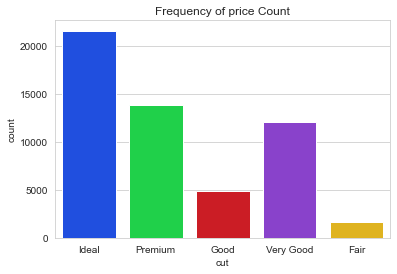

In [17]:
sns.countplot(x='cut',data=diamond)
plt.title("Frequency of price Count")
plt.show()

## 9. Line Plot

<AxesSubplot:>

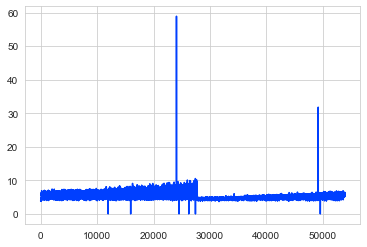

In [19]:
diamond['y'].plot.line()

## 10.Bar Chart

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

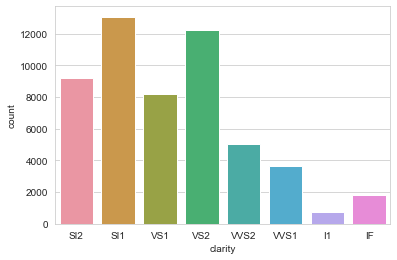

In [22]:
sns.countplot(diamond['clarity'])

## 11. Distribution PLOTS :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


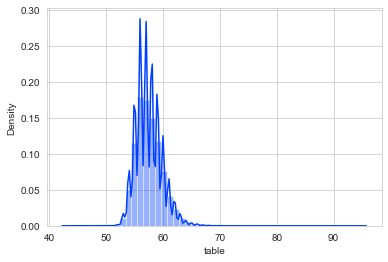

In [23]:
sns.distplot(diamond.table)# this plot is used to check the density of the table.
plt.show()

#### Write a Python program to display all Bivariate plots from the dataframe.

1.   Numeric to Numeric based plots
2.   Numeric to Categorical Plots
3.   Categorical to Categorical Plots






# 1.Numeric to Numeric based plots:

## Scatter plot

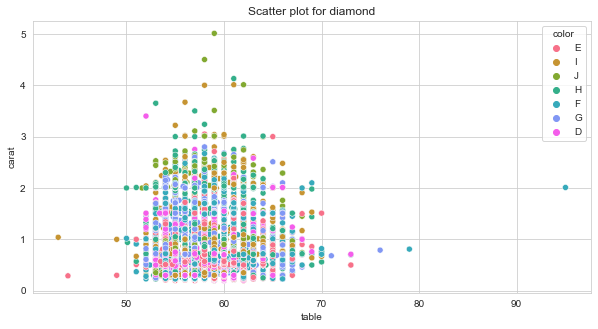

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='table',y='carat',data=diamond,hue='color')
plt.title("Scatter plot for diamond")
plt.show()

One of the interesting features in seaborn is the ‘hue’ parameter. In seaborn, the hue parameter determines which column in the data frame should be used for color encoding. This helps to differentiate between the data values according to the categories they belong to. The hue parameter takes the grouping variable as it’s input using which it will produce points with different colors. The variable passed onto ‘hue’ can be either categorical or numeric, although color mapping will behave differently in the latter case.

## Regression plot:

<AxesSubplot:xlabel='carat', ylabel='y'>

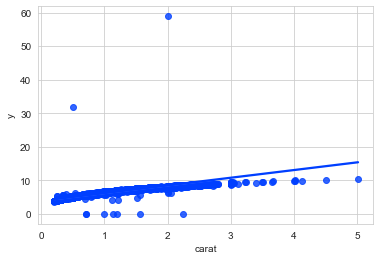

In [32]:
# use the function regplot to make a scatterplot
sns.regplot(x=diamond["carat"], y=diamond["y"])

## line plot

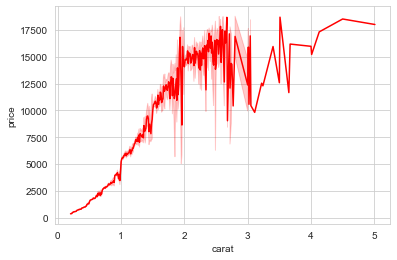

In [38]:
sns.lineplot(x='carat',y='price',data=diamond,color='red')
plt.show()

# 2.Numeric to categorical plots:

## Box plot

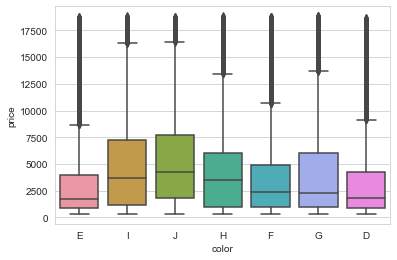

In [39]:
sns.boxplot(x='color',y='price',data=diamond)
plt.show()

## Bar plot

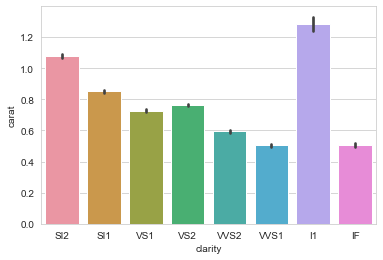

In [41]:
sns.barplot(x='clarity',y='carat',data=diamond)
plt.show()

## Violin plot

<Figure size 720x720 with 0 Axes>

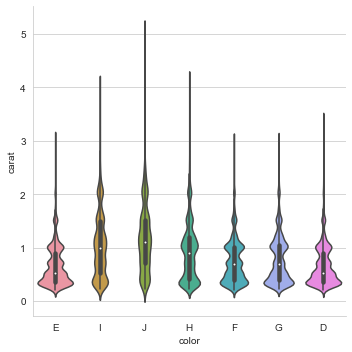

In [42]:
plt.figure(figsize=(10,10))
sns.catplot(x='color',y='carat',data=diamond,kind='violin')
plt.show()

## scatter plot

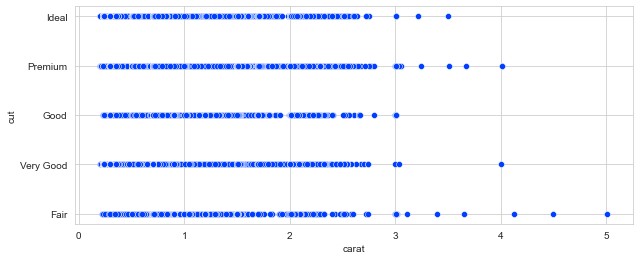

In [46]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='carat',y='cut',data=diamond)
plt.show()

# 3. Categorical to Categorical Plots

## Factor plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


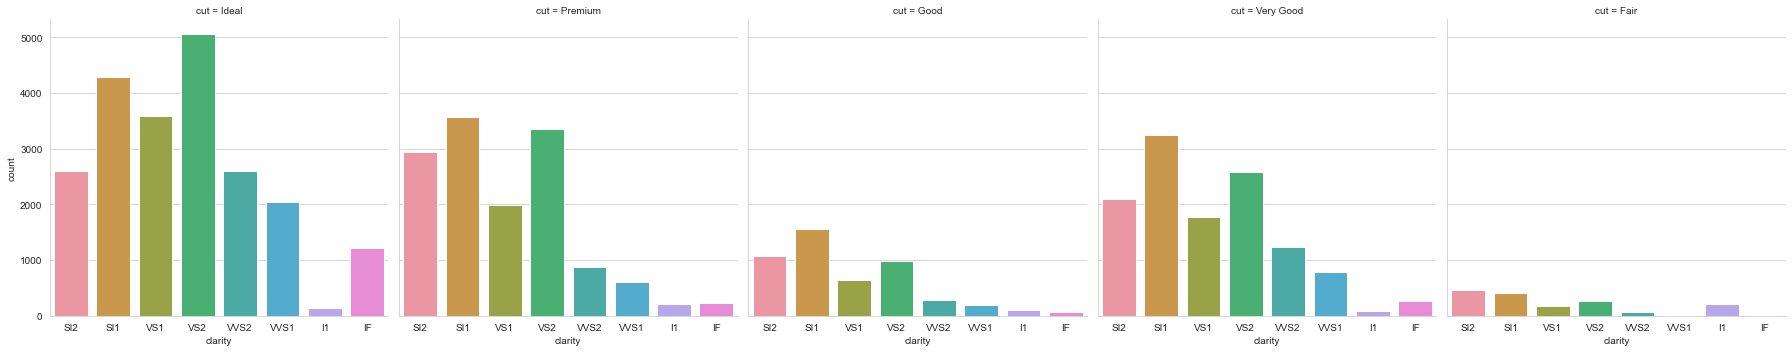

In [49]:
sns.factorplot(x='clarity',col='cut',kind='count',data=diamond)

## scatter plot

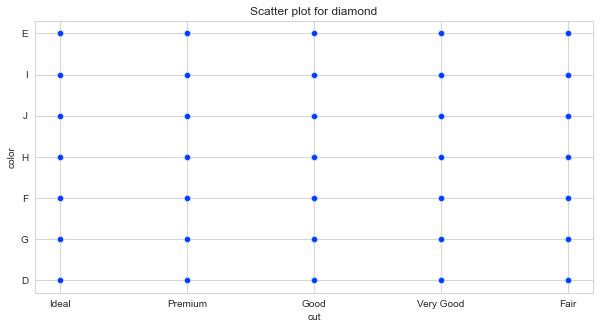

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='cut',y='color',data=diamond)
plt.title("Scatter plot for diamond")
plt.show()

## strip plot

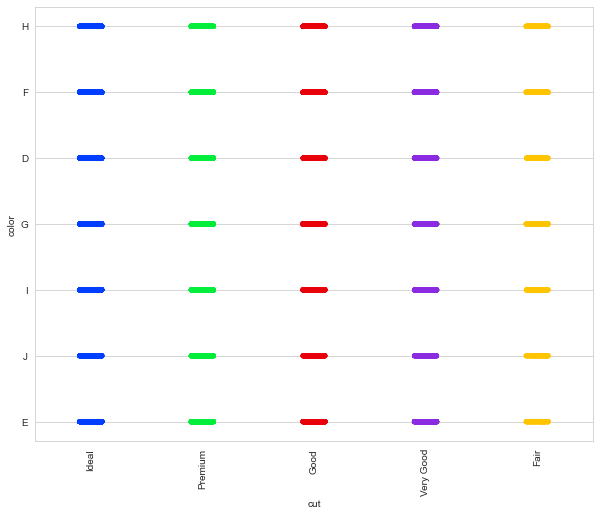

In [55]:
plt.figure(figsize=(10,8))
sns.stripplot(x='cut',y='color',data=diamond,jitter=0.1)
plt.xticks(rotation=90)
plt.show()

#### Write a Python program to display all Multivariate plots from the dataframe.

## Strip plot

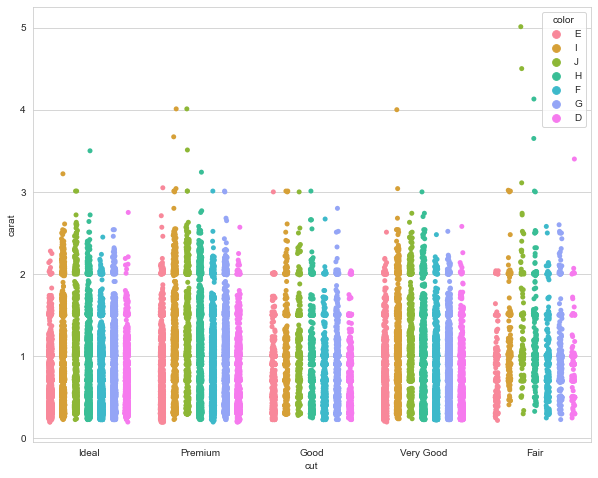

In [57]:
plt.figure(figsize=(10,8))
sns.stripplot(x='cut', y='carat', data=diamond,
              jitter=True, hue='color', dodge=True)
plt.show()

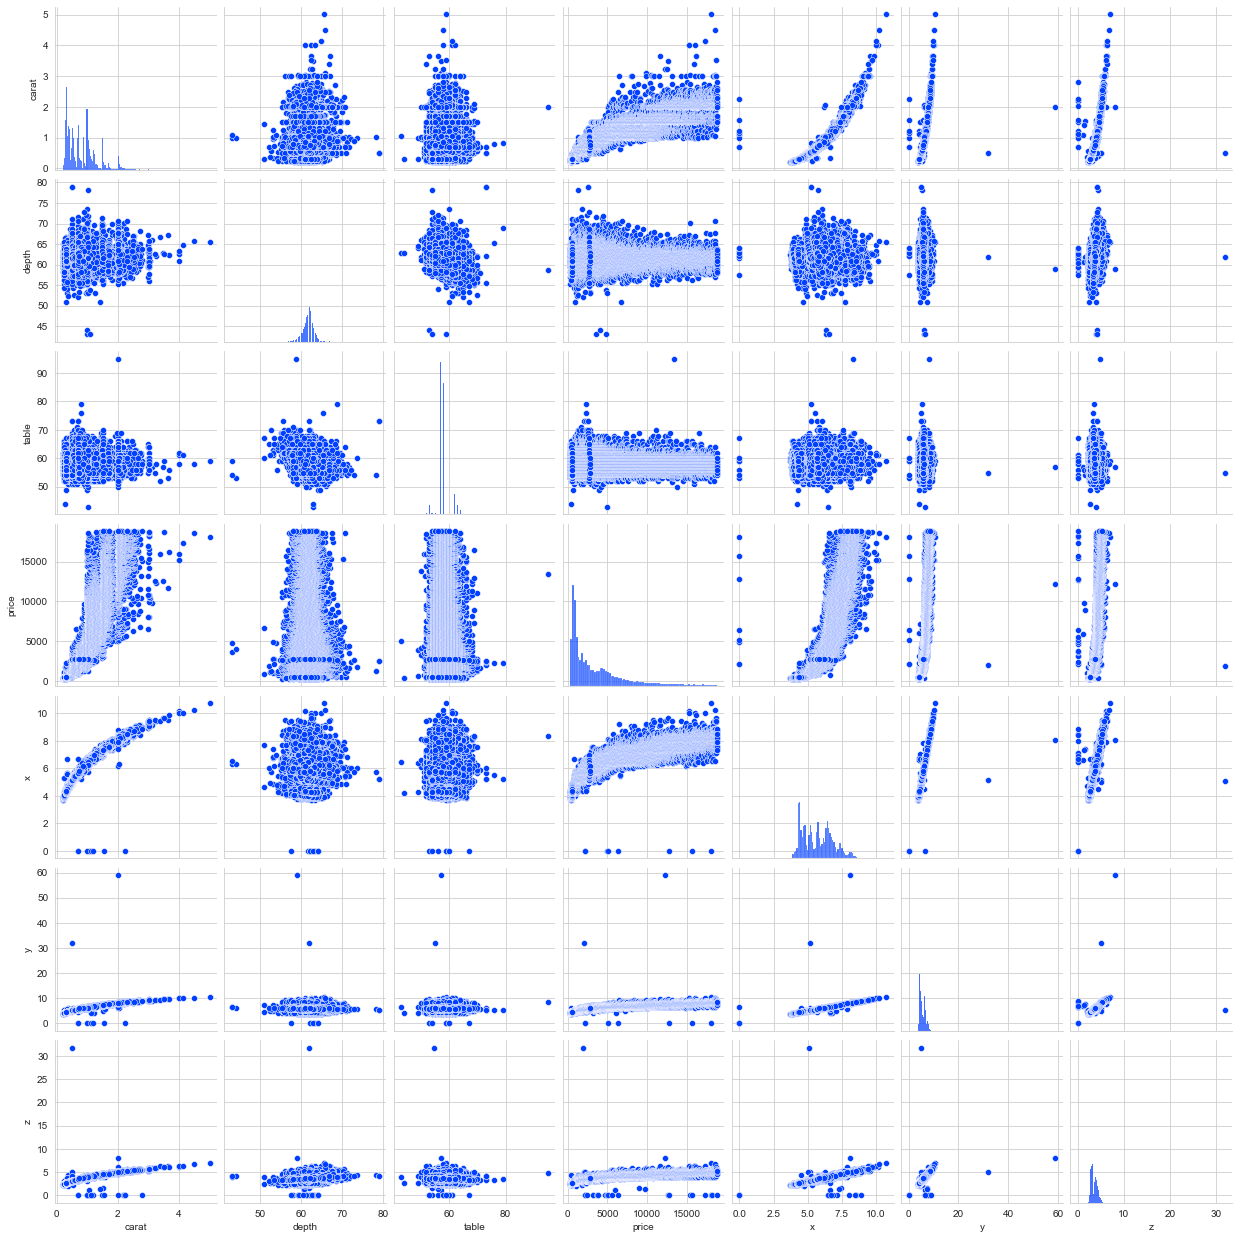

In [59]:
sns.pairplot(diamond) #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

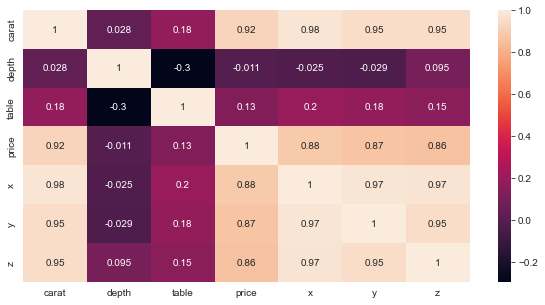

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(diamond.corr(),annot=True)
plt.show()

##### hint - https://www.python-graph-gallery.com/